In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Agent1:

    def __init__(self, random=0.2):
        self.random = random
        self.previous_outcome = None

    def actions_choose(self):
        if self.previous_outcome == 'win':
            return np.random.choice(['head', 'tail'], p=[0.5 + self.random/2, 0.5 - self.random/2])
        elif self.previous_outcome == 'lose':
            return np.random.choice(['head', 'tail'], p=[0.5 - self.random/2, 0.5 + self.random/2])
        else:
            return np.random.choice(['head', 'tail'])

    def update_previous_outcome(self, result):
        self.previous_outcome = result

class Agent2:

    def __init__(self, ptc=2):
        self.previous_choice = []
        self.ptc = ptc

    def actions_choose(self):
        if len(self.previous_choice) >= self.ptc:
            if self.previous_choice[-1] == self.previous_choice[-2]:
                if self.previous_choice[-1] == 'head':
                    return 'tail'
                else:
                    return 'head'
        return np.random.choice(['head', 'tail'])

    def update_previous_choices(self, choice):
        self.previous_choice.append(choice)

def play_matching_pennies(agent1, agent2, number_of_trials=120):
    agent1_wins = []
    agent2_wins = []

    for _ in range(number_of_trials):
        option1 = agent1.actions_choose()
        option2 = agent2.actions_choose()
        result = 'win' if option1 != option2 else 'lose'
        if result == 'win':
            agent1_wins.append(1)
            agent2_wins.append(0)
        else:
            agent1_wins.append(0)
            agent2_wins.append(1)
        agent1.update_previous_outcome(result)
        agent2.update_previous_choices(option2)
    return agent1_wins, agent2_wins

all_agent1_wins = []
all_agent2_wins = []

num_populations = 100
for _ in range(num_populations):
    agent1 = Agent1()
    agent2 = Agent2()
    agent1_wins, agent2_wins = play_matching_pennies(agent1, agent2)
    all_agent1_wins.append(agent1_wins)
    all_agent2_wins.append(agent2_wins)

all_agent1_wins = np.array(all_agent1_wins)
all_agent2_wins = np.array(all_agent2_wins)



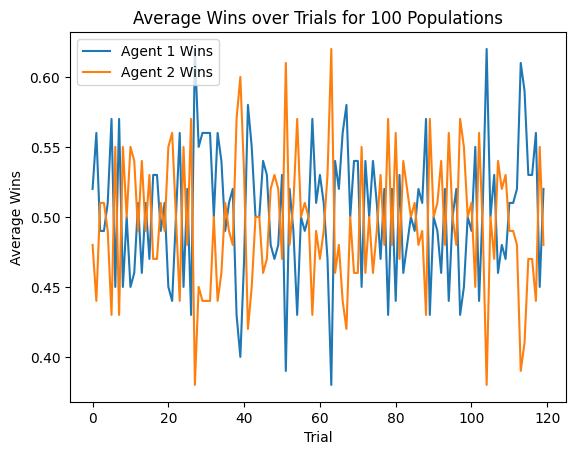

In [8]:
avg_agent1_wins = np.mean(all_agent1_wins, axis=0)
avg_agent2_wins = np.mean(all_agent2_wins, axis=0)

plt.plot(avg_agent1_wins, label='Agent 1 Wins')
plt.plot(avg_agent2_wins, label='Agent 2 Wins')
plt.xlabel('Trial')
plt.ylabel('Average Wins')
plt.title('Average Wins over Trials for 100 Populations')
plt.legend()
plt.show()


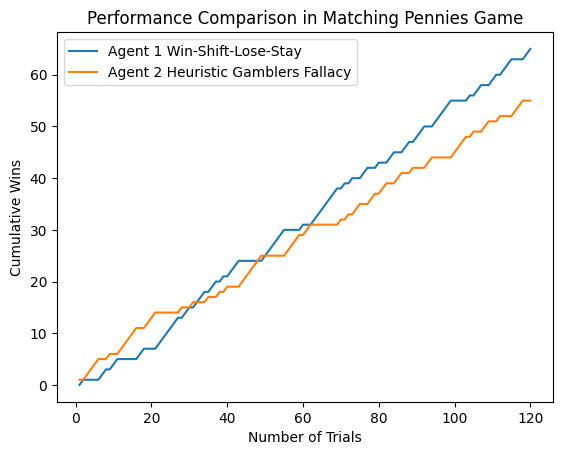

In [9]:

total_agent1_wins = np.cumsum(agent1_wins)
total_agent2_wins = np.cumsum(agent2_wins)

plt.plot(np.arange(1, len(total_agent1_wins) + 1), total_agent1_wins, label='Agent 1 Win-Shift-Lose-Stay ')
plt.plot(np.arange(1, len(total_agent2_wins) + 1), total_agent2_wins, label='Agent 2 Heuristic Gamblers Fallacy')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Wins')
plt.title('Performance Comparison in Matching Pennies Game')
plt.legend()
plt.show()


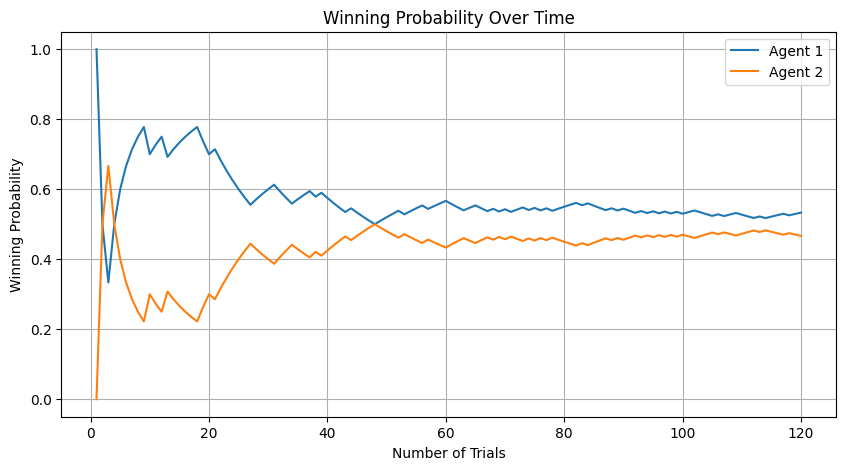

In [4]:
winning_prob_agent1 = np.array(total_agent1_wins) / np.arange(1, len(total_agent1_wins) + 1)
winning_prob_agent2 = np.array(total_agent2_wins) / np.arange(1, len(total_agent2_wins) + 1)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(winning_prob_agent1) + 1), winning_prob_agent1, label='Agent 1')
plt.plot(np.arange(1, len(winning_prob_agent2) + 1), winning_prob_agent2, label='Agent 2')
plt.xlabel('Number of Trials')
plt.ylabel('Winning Probability')
plt.title('Winning Probability Over Time')
plt.legend()
plt.grid(True)
plt.show()

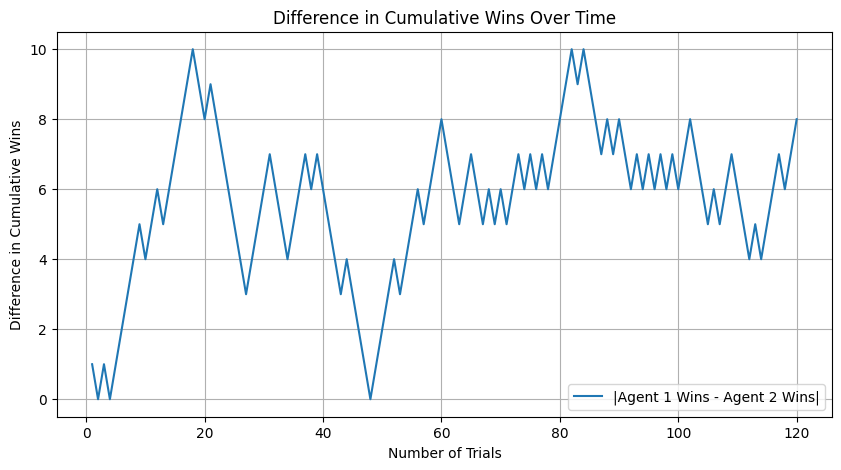

In [5]:
win_difference = np.abs(np.array(total_agent1_wins) - np.array(total_agent2_wins))

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(win_difference) + 1), win_difference, label='|Agent 1 Wins - Agent 2 Wins|')
plt.xlabel('Number of Trials')
plt.ylabel('Difference in Cumulative Wins')
plt.title('Difference in Cumulative Wins Over Time')
plt.legend()
plt.grid(True)
plt.show()